In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = scipy.io.loadmat('data/ex7data2.mat')

In [3]:
X = data['X']
X[:5]

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405]])

In [4]:
K = 3 #clusters
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])

In [5]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0])
    for i in range(len(X)):
        distance = -1
        for j in range(K):
            kDist = np.linalg.norm(X[i] - centroids[j])
            if distance == -1 or distance > kDist:
                distance = kDist
                idx[i] = j
        
    return idx
idx = findClosestCentroids(X, initial_centroids)
idx[:5]

array([ 0.,  2.,  1.,  0.,  0.])

In [6]:
def computeCentroids(X, idx, K):
    centroid = np.zeros((K,X.shape[1]))
    for i in range(K):
        for j in range(X.shape[1]):
            select_range = np.where(idx==i)[0]
            if len(select_range) == 0:
                centroid[i,j] = 0
            else:
                centroid[i,j] = X[select_range, j].mean(axis=0)
    return centroid
centroids = computeCentroids(X, idx, K)
centroids

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [7]:
K = 3;
max_iters = 10;

In [8]:
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])

K-Means iteration 1/10...


K-Means iteration 2/10...


K-Means iteration 3/10...


K-Means iteration 4/10...


K-Means iteration 5/10...


K-Means iteration 6/10...


K-Means iteration 7/10...


K-Means iteration 8/10...


K-Means iteration 9/10...


K-Means iteration 10/10...




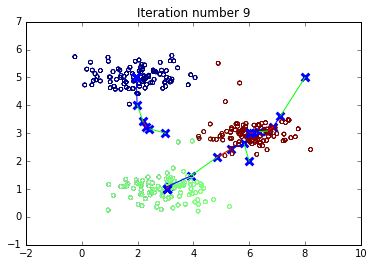

In [11]:
import itertools
from plotProgresskMeans import plotProgresskMeans
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    """runs the K-Means algorithm on data matrix X, where each
    row of X is a single example. It uses initial_centroids used as the
    initial centroids. max_iters specifies the total number of interactions
    of K-Means to execute. plot_progress is a true/false flag that
    indicates if the function should also plot its progress as the
    learning happens. This is set to false by default. runkMeans returns
    centroids, a Kxn matrix of the computed centroids and idx, a m x 1
    vector of centroid assignments (i.e. each entry in range [1..K])
    """

# Plot the data if we are plotting progress
    if plot_progress:
        plt.figure()

# Initialize values
    m, n = X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    c = itertools.cycle('012')
    rgb = np.eye(3)
# Run K-Means
    for i in range(max_iters):
    
        # Output progress
        print 'K-Means iteration %d/%d...' % (i+1, max_iters)

        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
    
        # Optionally, plot progress here
        if plot_progress:
            color = rgb[int(next(c))]
            plotProgresskMeans(X, np.array(centroids),
                               np.array(previous_centroids), idx, K, i, color)
            previous_centroids = centroids
            # raw_input("Press Enter to continue...")

    # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)

# Hold off if we are plotting progress
    if plot_progress:
        pass
    # hold off
    return centroids, idx
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

In [10]:
print centroids
print idx[:5]

[[ 1.95399466  5.02557006]
 [ 3.04367119  1.01541041]
 [ 6.03366736  3.00052511]]
[ 0.  2.  2.  0.  0.]


In [11]:
import scipy.misc

In [12]:
A = scipy.misc.imread('data/bird_small.png')

In [13]:
print A.shape
print A

(128, 128, 3)
[[[219 180 103]
  [230 185 116]
  [226 186 110]
  ..., 
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ..., 
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ..., 
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ..., 
 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ..., 
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ..., 
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ..., 
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]


In [14]:
A = A / 255.

In [15]:
img_size = A.shape

In [16]:
X = A.reshape(img_size[0] * img_size[1], 3)

In [17]:
print X.shape
print X[:5]

(16384, 3)
[[ 0.85882353  0.70588235  0.40392157]
 [ 0.90196078  0.7254902   0.45490196]
 [ 0.88627451  0.72941176  0.43137255]
 [ 0.8745098   0.7254902   0.41176471]
 [ 0.88235294  0.70196078  0.40392157]]


In [18]:
K = 16; 
max_iters = 10;

In [19]:
def kMeansInitCentroids(X, K):
    return np.random.random_sample((K, X.shape[1]))
initial_centroids = kMeansInitCentroids(X, K)

In [20]:
print initial_centroids.shape
print initial_centroids

(16, 3)
[[ 0.73169496  0.59754728  0.16290198]
 [ 0.97862703  0.99865826  0.57143619]
 [ 0.91278768  0.618156    0.79486952]
 [ 0.64672124  0.06447963  0.35681301]
 [ 0.31794685  0.68381782  0.9934307 ]
 [ 0.80436465  0.03642495  0.18137327]
 [ 0.18739499  0.56735817  0.19529621]
 [ 0.44314784  0.96413     0.09762853]
 [ 0.76429596  0.94504968  0.4438664 ]
 [ 0.86604148  0.21787111  0.65180079]
 [ 0.56836505  0.11418571  0.60418757]
 [ 0.48294662  0.36719515  0.52359294]
 [ 0.51669527  0.11195942  0.46952653]
 [ 0.25426966  0.23383612  0.14750441]
 [ 0.12505705  0.42396004  0.97014925]
 [ 0.74741437  0.54983698  0.44351457]]


In [21]:
centroids, idx = runkMeans(X, initial_centroids, max_iters)

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


In [22]:
print centroids
print idx

[[ 0.79342569  0.57169126  0.27679807]
 [ 0.97303423  0.92242606  0.76028581]
 [ 0.8338594   0.74044955  0.70867049]
 [ 0.57435385  0.42065219  0.20879637]
 [ 0.53218583  0.65933601  0.82352941]
 [ 0.1167021   0.12497477  0.11542856]
 [ 0.07297079  0.07929634  0.06896155]
 [ 0.          0.          0.        ]
 [ 0.88183797  0.72642881  0.45954644]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.50706289  0.45326345  0.45039351]
 [ 0.36193374  0.30085746  0.27045608]
 [ 0.20365648  0.19542147  0.18833038]
 [ 0.          0.          0.        ]
 [ 0.69279467  0.60571816  0.50005052]]
[  8.   8.   8. ...,  13.  13.  13.]


In [23]:
idx = findClosestCentroids(X, centroids)

In [24]:
idx

array([  8.,   8.,   8., ...,  13.,  13.,  13.])

/Users/andy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


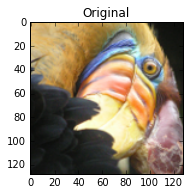

In [26]:
# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by it's index in idx) to the centroid value
X_recovered = np.array([centroids[e] for e in idx])

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

# Display the original image 
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')
plt.show()

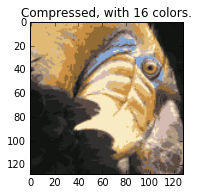

In [27]:
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.' % K)
plt.show()